<H1> Nombre: Esteban </H1>
<H1> Apellido: Vivanco</H1>
<H1> Número de alumno: 1763766J</H1>

In [86]:
!gdown --id 15Z0tkJW6NTdvi9q0G3vQDgRyniXzqEzG

Downloading...
From: https://drive.google.com/uc?id=15Z0tkJW6NTdvi9q0G3vQDgRyniXzqEzG
To: /content/diamonds.zip
100% 712k/712k [00:00<00:00, 96.6MB/s]


In [87]:
!pip install tensorflow-addons
import pandas as pd
import numpy as np
import tensorflow as tf 
import tensorflow_addons as tfa
import keras
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

#Functions

In [88]:
cut_dic = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_dic = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7}
clarity_dic = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 
               'VVS1': 7, 'IF': 8}

In [89]:
def to_numeric(df, cut_dic, color_dic, clarity_dic):
  for i in range(0, len(df['cut'])):
    df['cut'][i] = cut_dic[df['cut'][i]]
  for j in range(0, len(df['color'])):
    df['color'][j] = color_dic[df['color'][j]]
  for w in range(0, len(df['clarity'])):
    df['clarity'][w] = clarity_dic[df['clarity'][w]] 
  return df

In [90]:
def to_XY(df, cut_dic, color_dic, clarity_dic):
  X_train = []
  X_val = []
  X_test = []
  Y_train = []
  Y_val = []
  Y_test = []
  scaler = StandardScaler()
  numeric_df = to_numeric(df, cut_dic, color_dic, clarity_dic)
  df_test = numeric_df.loc[df['Usage'] == 'Test']
  df_tov = numeric_df.loc[df['Usage'] == 'ToV']
  X_test = df_test[['carat','cut','color','clarity','depth',
                    'table','x','y','z']]
  preX_tov = df_tov[['carat','cut','color','clarity','depth',
                    'table','x','y','z']]
  Y_test = df_test[['price']]
  preY_tov = df_tov[['price']]
                    
  X_train, X_val, Y_train, Y_val = train_test_split( preX_tov, preY_tov, 
                                                    test_size=0.2, 
                                                    random_state=77)
  X_train = scaler.fit_transform(X_train)
  X_val = scaler.fit_transform(X_val)
  X_test = scaler.fit_transform(X_test)

  return X_train, X_val, X_test, Y_train, Y_val, Y_test

#Pregunta 1

In [91]:
df = pd.read_csv('diamonds.zip')

In [92]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Usage
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,ToV
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Test
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,ToV
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,ToV
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,ToV


In [93]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
Usage         0
dtype: int64

Se realizó una primera lectura de datos, en la cuál no se detectaron datos nulos. 

En esta revisión también se detectó que la mayoría de las series tenían valores numéricos, pero también se detectó la existencia de series cuyos valores no estaban representados de manera numérica. Esta situación en particular se detectó para las series "cut", "color" y "clarity". Para cada uno de los casos antes mencionados se creará un diccionario que asigne el valor numérico "1" a la peor opción de la serie, y el valor máximo (longitud del diccionario) a la mejor opción. De esta manera todos los datos del set quedarán como valores numéricos. Los datos serán procesados a través de la función *to_numeric*.

Con respecto a cada serie:
- carat: toma valores decimales, al menos en el head, acotados superiormente por 0.5
- cut: tiene valores no numéricos pero serán transformados a valores numéricos entre 1 y la cantidad de clases.
- color: tiene valores no numéricos pero serán transformados a valores numéricos entre 1 y la cantidad de clases.
- clarity: tiene valores no numéricos pero serán transformados a valores numéricos entre 1 y la cantidad de clases.
- depth: podemos notar que toma valores numéricos que superan el 50, bastante distante con respecto a carat.
- table: toma valores numércios que superan el 50, valores similares a depth.
- price: toma valores numéricos que superan el 300. En general, tiene los valores más altos de las series.
- x, y ,z: estas tres series toman valores bastantes similares, tomando de referencia el head, estos valores oscilan entre 2 y 5.
- usage: toma valores no numéricos que indican el uso del ejemplo.

In [94]:
raw_X = df[['carat','cut','color','clarity','depth','table','x','y','z']]
raw_Y = df[['price']]

In [96]:
print(f'La shape de raw_X es : {raw_X.shape}')
print(f'La shape de raw_Y es : {raw_Y.shape}')

La shape de raw_X es : (53940, 9)
La shape de raw_Y es : (53940, 1)


Consultando las shapes de las matrices "X" e "Y" del set completo podemos mencionar que cada ejemplo de la matriz "X" se compone de 9 características y que cada ejemplo de la matriz "Y" se compone de una única característica, la serie "price". Además, existe un total de 53,940 ejemplos.


#Pregunta 2

In [97]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = to_XY(df, cut_dic, color_dic, 
                                                       clarity_dic)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


En la revisión anterior se detectó la existencia de series cuyos valores no estaban representados de manera numérica. Esta situación en particular se detectó para las series "cut", "color" y "clarity". Para cada uno de los casos antes mencionados se creó un diccionario que asignaba el valor 1 a la peor opción de la serie, y el valor máximo a la mejor opción. De esta manera todos los datos del set quedaron como valores numéricos a partir de la función *to_numeric* implementada dentro de la función *to_XY*

Debido a la diferencia de valores encontrada, se aplicará un pre procesamiento de datos a través del método *StandardScaler* de la librería *sklearn*, con el fin de tener datos más homogéneos como *input* para nuestro modelo.

Aplicado lo anterior, se procedió a dividir el set completo de datos en 3 subconjuntos. Los datos con "Usage" = "Test" se asignaron al set de test, mientras que de los datos con "Usage" = "ToV" se asignó un 80% al set de entrenamiento y un 20% al set de validación a través del método *train_test_split* de la librería *sklearn*. Esta última división se aplicó a partir de la materia vista en clases, la que indica que destinar gran parte de los datos al set de entrenamiento puede generar considerables ventajas al momento de testear los datos luego de entrenado el modelo. 

Los 3 subconjuntos fueron divididos en un array "X" y un array "Y". La primera contiene todas las series del *dataframe* original, menos la serie "price", mientras que el array "Y" solo contiene la serie "price", extraída del array "X".

La división del *dataframe* original se hizo a través de la función *to_XY* que además utiliza la función *to_numeric* antes mencionada. Estas funciones reciben como *input* el *dataframe* original y los diccionarios antes mencionados



In [98]:
print(f'La shape de X_train es : {X_train.shape}')
print(f'La shape de Y_train es : {Y_train.shape}')
print(f'La shape de X_val es : {X_val.shape}')
print(f'La shape de Y_val es : {Y_val.shape}')
print(f'La shape de X_test es : {X_test.shape}')
print(f'La shape de Y_test es : {Y_test.shape}')

La shape de X_train es : (38872, 9)
La shape de Y_train es : (38872, 1)
La shape de X_val es : (9718, 9)
La shape de Y_val es : (9718, 1)
La shape de X_test es : (5350, 9)
La shape de Y_test es : (5350, 1)


Consultando las shapes de las matrices antes mencionadas podemos mencionar que si bien el set "ToV" se dividió en un 80% train set y 20% validation set, en términos generales, la división del total de instancias del set es: 72% train set, 18% validation set y 10% test set, sobre un total de 53,940 ejemplos. Se nota que la suma de ejemplos entre los 3 sets coincide con la cantidad de ejemplos observados en *raw_X* lo que indica consistencia en la división del conjunto original en subconjuntos.

También podemos mencionar que en esta oportunidad la matriz "Y" de cada set tiene solo una dimensión para cada ejemplo y este "depende" de las 9 variables alojadas en cada row de su respectiva matriz "X".

In [99]:
X_train[:10]

array([[-1.01070713, -0.80968195, -1.52383503, -0.6374078 ,  0.80792434,
        -0.65524641, -1.20648386, -1.15950039, -1.09897551],
       [ 0.06602802, -1.7050494 ,  0.23717523, -0.02934566,  1.36570136,
         1.53061975,  0.09471545,  0.15822386,  0.29567517],
       [ 0.48827709,  0.0856855 , -0.34982819, -1.24546993, -0.23790757,
        -0.20915128,  0.77205208,  0.68704741,  0.69012183],
       [-0.79958259, -1.7050494 , -0.34982819, -0.6374078 ,  1.29597924,
        -0.20915128, -0.86781555, -0.89942324, -0.746791  ],
       [-1.03181959,  0.0856855 , -0.93683161, -0.02934566, -0.51679608,
         0.68303899, -1.19757154, -1.22018506, -1.23984932],
       [ 0.88941372,  0.0856855 ,  0.23717523,  0.57871647,  0.31986945,
         0.68303899,  1.01268483,  0.93845533,  1.01413159],
       [-0.18732143,  0.0856855 , -0.34982819, -0.02934566, -2.6084599 ,
         2.0213244 ,  0.10362778,  0.06286224, -0.22555791],
       [-0.77847014,  0.98105296,  1.41118207, -0.6374078 , -0

Al rescatar los primeros 10 ejemplos de nuestra X del set de entrenamiento, podemos notar que estos toman valores más homogéneos entre las distintas series. Cabe mencionar que el los valores de la serie "price" no fueron alterados.

#Pregunta 3

Comencé con 10 epochs para entrenar el modelo, pero al notar que no existía mucho avance entre los distintos valores de las neuronas, decidí buscar información al respecto sobre algún número recomendado de epochs. Encontré información que sugiere 100 pero al correrlo se demoraba demasiado, por ello, terminé optando por 50 epochs.

[Info en stackoverflow](https://stackoverflow.com/questions/35050753/how-big-should-batch-size-and-number-of-epochs-be-when-fitting-a-model-in-keras#:~:text=I%20got%20best%20results%20with,b%2Fw%2050%20to%20100.)

In [100]:
act_functions = ['relu', 'tanh', 'sigmoid']
metrics_list = ['mae', 'mse']
values1 = [9, 9, 12, 13, 15]
values2 = [5, 8, 9, 12, 14]

In [101]:
lossList = []
mseList = []
maeList = []
for act in act_functions:
  print(f'Funcion de activacion: {act}')
  for i in range(0, len(values1)):
    model = Sequential()
    input_layer = Dense(values1[i], input_shape=X_train.shape, activation=act)
    model.add(input_layer)
    hidden_layer = Dense(values2[i], activation=act)
    model.add(hidden_layer)
    output_layer = Dense(1)
    model.add(output_layer)
    model.compile(loss='mse', optimizer='adam', metrics=metrics_list)
    history = model.fit(X_train, Y_train, epochs=50, batch_size=32,verbose=0)
    loss, mae, mse = model.evaluate(X_val,Y_val,verbose=0)
    print(f'[{values1[i]},{values2[i]}]: {loss} | {mae} | {mse}')
    lossList.append(loss)
    mseList.append(mse)
    maeList.append(mae)

    



Funcion de activacion: relu
[9,5]: 758044.8125 | 460.7629699707031 | 758044.8125
[9,8]: 815485.875 | 466.20635986328125 | 815485.875
[12,9]: 755343.4375 | 448.4542236328125 | 755343.4375
[13,12]: 710551.5625 | 411.5385437011719 | 710551.5625
[15,14]: 776254.875 | 445.1945495605469 | 776254.875
Funcion de activacion: tanh
[9,5]: 28450662.0 | 3557.16943359375 | 28450662.0
[9,8]: 27194274.0 | 3382.649658203125 | 27194274.0
[12,9]: 26800680.0 | 3330.929931640625 | 26800680.0
[13,12]: 25645184.0 | 3194.677001953125 | 25645184.0
[15,14]: 24921412.0 | 3123.44482421875 | 24921412.0
Funcion de activacion: sigmoid
[9,5]: 28483182.0 | 3561.731201171875 | 28483182.0
[9,8]: 27207258.0 | 3384.39013671875 | 27207258.0
[12,9]: 26836288.0 | 3335.509765625 | 26836288.0
[13,12]: 25713576.0 | 3201.995361328125 | 25713576.0
[15,14]: 24977240.0 | 3128.53662109375 | 24977240.0


In [ ]:
print(f'Funcion de activacion: {act}')
print(f'Values  |     loss     |   mae   |    mse   ')
print(f'---------------------------------------------')
print(f'[{values1[i]},{values2[i]}]: {loss} | {mae} | {mse}')

Con los resultados anteriores podemos notar que el modelo con mejor desempeño es el que tiene función de activación relu, que posee 13 neuronas en el *input layer* y 12 neuronas en el *hidden layer*. 

Con esta confirguración el modelo alcanzó un mae mínimo cercano a 411, un mse cercano a 710,551 y un loss de 710,551 igualmente.

Cabe destacar que los modelos con función de activación relu tuvieron notablemente mejor desempeño que los que tienen función de activación tanh y sigmoid para cualquier configuración de neuronas.

Además, me gustaría agregar que comencé la validación de datos con un *output layer* con 9 neuronas y el mejor resultado encontrado fue cercano a los 1,600 en mae, con la función tanh. Al cambiar el número de neuronas del layer final a 1, el mejor resultado bajó su valor de manera considerable pero esta vez para los modelos con función de activación relu. Por su parte, los modelos con función de activación tanh empeoraron considerablemente su resultado con este cambio.



Procedemos a testear el modelo con la configuración que consiguió mejores resultados en el test de validación

In [110]:
p3_model = Sequential()
input_layer = Dense(13, input_shape=X_train.shape, activation='relu')
p3_model.add(input_layer)
hidden_layer = Dense(12, activation='relu')
p3_model.add(hidden_layer)
output_layer = Dense(1)
p3_model.add(output_layer)
p3_model.compile(loss='mse', optimizer='adam', metrics=metrics_list)
p3_history = p3_model.fit(X_train, Y_train, epochs=50, batch_size=32,verbose=0)
print(f'Resultado del modelo con activacion relu y values [13, 12, 1]')
loss, mae, mse = p3_model.evaluate(X_test,Y_test,verbose=1)
print(f'loss: {loss} | mae: {mae} | mse: {mse}')

Resultado del modelo con activacion relu y values [13, 12, 1]
168/168 [==============================] - 0s 2ms/step - loss: 809992.4375 - mae: 464.9499 - mse: 809992.4375
loss: 809992.4375 | mae: 464.9498596191406 | mse: 809992.4375


In [ ]:
p3y_predicted = p3_model.predict(X_test)

Al entrenar nuevamente el modelo con mejores resultados en el set de validación y ponerlo a prueba en el set de test notamos que el resultado empeora de 411 a 464 en mae, diferencia porcentualmente significativa, ya que corresponde a una diferencia de 53 unidades, cerca de un 12.9% más con respecto al desemepeño en el set de validación.

In [111]:
epochs = [i for i in range(1,51)]

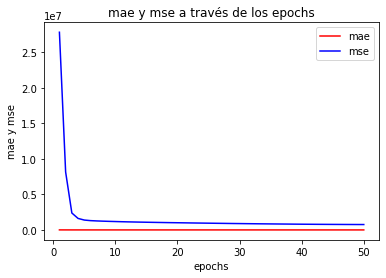

In [116]:
plt.plot(epochs, p3_history.history['mae'], c='red')
plt.plot(epochs, p3_history.history['mse'], c='blue')
plt.title('mae y mse a través de los epochs')
plt.ylabel('mae y mse')
plt.xlabel('epochs')
plt.legend(['mae', 'mse'], loc='upper right')
plt.show()

Podemos observar que mse se cuentra siempre sobre mae y que los primeros valores de mse son bastante elevados, lo que provoca perder detalle del progreso de ambas métricas a lo largo de los epochs.

Se procede a separar los gráficos para tener información gráfica más clara en cuanto a al avance.


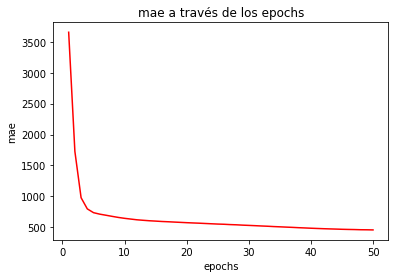

In [117]:
plt.plot(epochs, p3_history.history['mae'], c='red')
plt.title('mae a través de los epochs')
plt.ylabel('mae')
plt.xlabel('epochs')
plt.show()

Con el gráfico de mae aislado podemos notar que el valor que toma en los primeros epochs son bastante elevados y cerca del epoch 5 toma valores aceptables. Además podemos notar que entre los epochs 30 y 40 su tasa de mejora disminuye bastante

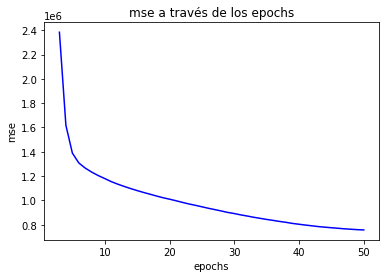

In [118]:
plt.plot(epochs[2:], p3_history.history['mse'][2:], c='blue')
plt.title('mse a través de los epochs')
plt.ylabel('mse')
plt.xlabel('epochs')
plt.show()

Se descartan los 2 primeros valores de mse para poder apreciar de mejor manera la disminución del valor a través de los epochs, ya que los primeros dos valores escapan mucho con respecto a los otros y no permiten visualizar de manera detallada el avance del modelo con respecto a esta métrica.

#Pregunta 4

Se procede a hacer un nuevo estudio agregando nuevas capas intermedias. Se mantuvo la función de activación relu y los valores de neuronas presentes en los *layers* de *input*, *pre_hidden* (referencia a que era el hidden original) y *output*. 

En particular, se hace un estudio con 1, 2 y 3 capas agregadas, dando un total de 4, 5 y 6 capas respectivamente. De esta manera se prueba el modelo con los valores antes definidos y nuevas variables de valores especificados más abajo.

Las nuevas capas fueron agregadas entre la capa de *input* y la capa *pre_hidden*, que corresponde al *hidden layer* de la pregunta 3.

En términos generales podemos mencionar mejoras en cuanto al desempeño del modelo en la predicción. De esta manera, podemos deducir que un mayor aprendizaje de este sobre el set de datos está siendo favorable para la predicción de datos y no está causando *overfitting* (a priori).



In [119]:
metrics_list = ['mae', 'mse']
values3 = [14, 14, 9, 13, 15]
values4 = [13, 9, 13, 9, 14]
values5 = [14, 13, 9, 14, 13]

In [122]:
lossList2 = []
mseList2 = []
maeList2 = []
for l in range(1,4):
  for i in range(0, len(values3)):
    model = Sequential()
    input_layer = Dense(13, input_shape=X_train.shape, activation='relu')
    model.add(input_layer)
    if l >= 1:
      hidden1_layer = Dense(values3[i], activation='relu')
      model.add(hidden1_layer)
    if l >= 2:
      hidden2_layer = Dense(values4[i], activation='relu')
      model.add(hidden2_layer)
    if l >= 3:
      hidden3_layer = Dense(values5[i], activation='relu')
      model.add(hidden3_layer)
    pre_hidden_layer = Dense(12, activation='relu')
    model.add(pre_hidden_layer)
    output_layer = Dense(1)
    model.add(output_layer)
    model.compile(loss='mse', optimizer='adam', metrics=metrics_list)
    history = model.fit(X_train, Y_train, epochs=50, batch_size=32,verbose=0)
    loss, mae, mse = model.evaluate(X_val,Y_val,verbose=0)
    if l == 1:
      print(f'[13,{values3[i]},12,1]: {loss} | {mae} | {mse}')
    if l == 2:
      print(f'[13,{values3[i]},{values4[i]},12,1]: {loss} | {mae} | {mse}')
    if l == 3:
      print(f'[13,{values3[i]},{values4[i]},{values5[i]},12,1]: {loss} | {mae} | {mse}')
    lossList2.append(loss)
    mseList2.append(mse)
    maeList2.append(mae)

[13,14,12,1]: 639432.875 | 394.256103515625 | 639432.875
[13,14,12,1]: 784765.1875 | 436.0372619628906 | 784765.1875
[13,9,12,1]: 789181.75 | 436.63037109375 | 789181.75
[13,13,12,1]: 669821.8125 | 403.48529052734375 | 669821.8125
[13,15,12,1]: 797366.8125 | 443.9998474121094 | 797366.8125
[13,14,13,12,1]: 604406.375 | 388.4380798339844 | 604406.375
[13,14,9,12,1]: 506509.15625 | 356.06109619140625 | 506509.15625
[13,9,13,12,1]: 626665.375 | 399.3324890136719 | 626665.375
[13,13,9,12,1]: 741787.9375 | 424.30084228515625 | 741787.9375
[13,15,14,12,1]: 510861.5 | 357.3056335449219 | 510861.5
[13,14,13,14,12,1]: 651501.0 | 398.9507751464844 | 651501.0
[13,14,9,13,12,1]: 413584.03125 | 334.5040283203125 | 413584.03125
[13,9,13,9,12,1]: 449477.25 | 344.157470703125 | 449477.25
[13,13,9,14,12,1]: 617803.625 | 392.1350402832031 | 617803.625
[13,15,14,13,12,1]: 442707.5 | 338.5342712402344 | 442707.5


AL revisar los resultados obtenidos con los *layers* agregados podemos mencionar que el mejor resultado se obtuvo con la inserción de 3 layers extra, es decir, con un modelo con 6 layers en total. 

Estos resultados, no nos permiten decir que "mientras más layers mejor", ya que nos encontramos en un espacio de prueba bastante acotado y este no nos asegura que un resultado con 100 layers sea mejor que uno con 70 en términos generales, por ejemplo.

Si podemos deducir de esta etapa de validación que 3 layers pueden ser insuficientes al momento de aprender de un set de datos, haciendo deseable una cantidad de layers cercano a 10 (más que a 3).

En particular, el mejor resultado se obtuvo con 6 layers con valores 13, 14, 9, 13, 12, 1 en cuanto a la cantidad de neuronas utilizadas. Esta configuración logró llegar a un mínimo de mae cercano a 335.

In [123]:
p4_model = Sequential()
input_layer = Dense(13, input_shape=X_train.shape, activation='relu')
p4_model.add(input_layer)
hidden1_layer = Dense(14, activation='relu')
p4_model.add(hidden1_layer)
hidden2_layer = Dense(9, activation='relu')
p4_model.add(hidden2_layer)
hidden3_layer = Dense(13, activation='relu')
p4_model.add(hidden3_layer)
pre_hidden_layer = Dense(12, activation='relu')
p4_model.add(pre_hidden_layer)
output_layer = Dense(1)
p4_model.add(output_layer)
p4_model.compile(loss='mse', optimizer='adam', metrics=metrics_list)
p4_history = p4_model.fit(X_train, Y_train, epochs=50, batch_size=32,verbose=0)
loss, mae, mse = p4_model.evaluate(X_test,Y_test,verbose=0)
print(f'[15,14,9,13,14,1]: {loss} | {mae} | {mse}')

[15,14,9,13,14,1]: 425487.875 | 339.91094970703125 | 425487.875


Notamos que el desempeño del modelo sufrió una variación porcentual menor a la variación que sufrió nuestro modelo de 3 capas.

El modelo antes mencionado sufrió una variación de 12.5% en su desemepeño entre los set de validación y de test, mientras que el modelo con 6 capas sufrió una variación desde 335 a 339, es decir 4 puntos, lo que corresponde a un 1.2%.

In [124]:
p4y_predicted = p4_model.predict(X_test)

In [125]:
line = [j for j in range(1,19000)]

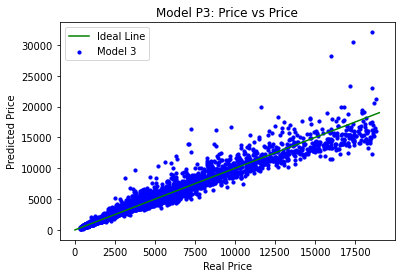

In [126]:
plt.plot(line,line,c='green')
plt.scatter(Y_test, p3y_predicted, c='blue', s=10)
plt.title('Model P3: Price vs Price')
plt.ylabel('Predicted Price')
plt.xlabel('Real Price')
plt.legend(['Ideal Line', 'Model 3'], loc='upper left')
plt.show()

Cada punto azul representa un ejemplo de la simulación, además se graficó una línea verde que sirve como referencia de exactitud en cuanto a la predicción.

A partir de esta interpretación, con respecto a nuestro modelo de la pregunta 3, por un lado podemos mencionar que existe mayor densidad en valores más bajos de los diamantes y que en un primer tramo nuestro modelo sobre estima el valor de los diamantes. 

Por otro, podemos mencionar que en la mitad superior de los valores reales de los diamantes nuestro modelo tiende a subestimar estos valores, con la excepción de un par de punto que se alejan del grueso de los puntos. Estos puntos alejados representan sobre estimaciones exageradas de nuestro modelo.

En términos generales podemos decir que el modelo estima bien el valor de los diamantes, ya que sigue la tendencia de la línea verde.


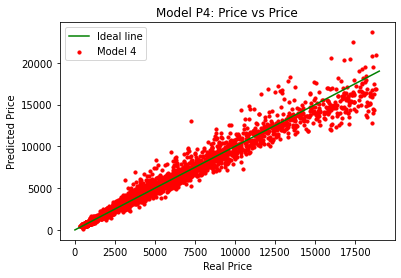

In [127]:
plt.plot(line,line,c='green')
plt.scatter(Y_test, p4y_predicted, c='red', s=10)
plt.title('Model P4: Price vs Price')
plt.ylabel('Predicted Price')
plt.xlabel('Real Price')
plt.legend(['Ideal line', 'Model 4'], loc='upper left')
plt.show()

Cada punto rojo representa un ejemplo de la simulación, además se graficó una línea verde que sirve como referencia de exactitud en cuanto a la predicción.

A partir de esta interpretación, con respecto a nuestro modelo de la pregunta 4, por un lado podemos mencionar que existe mayor densidad en valores más bajos de los diamantes y que en un primer tramo este modelo predice de mejor manera los valores de los diamantes, comparado con las predicciones del modelo obtenido en la pregunta 3.

Por otro, podemos mencionar que en la mitad superior de los valores reales de los diamantes nuestro modelo igualmente tiende a subestimar estos valores, pero estas nuevas capas de cierta manera "neutralizaron" los ejemplos en que nuestro modelo sobreestimaba de manera extrema el valor de los diamantes.

En términos generales podemos decir que este modelo estima el valor de los diamantes de mejor manera que el modelo 3.

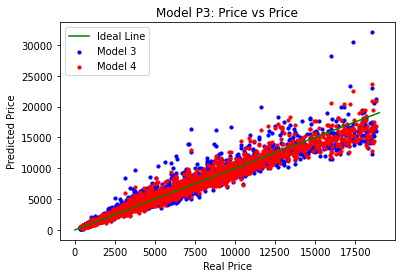

In [128]:
plt.plot(line,line,c='green')
plt.scatter(Y_test, p3y_predicted, c='blue', s=10)
plt.scatter(Y_test, p4y_predicted, c='red', s=10)
plt.title('Model P3: Price vs Price')
plt.ylabel('Predicted Price')
plt.xlabel('Real Price')
plt.legend(['Ideal Line','Model 3', 'Model 4'], loc='upper left')
plt.show()

Al sobreponer ambos gráficos, podemos notar que los puntos del modelo 4 se encuentran más "compactos" que los del modelo 4 con respecto a la línea ideal. En otras palabras, los puntos rojos se encuentran más cercanos a la línea que dicta el resultado ideal, con respecto a los puntos azules.

Además, como fue mencionado anteriormente, las capas agregadas en el modelo 4, neutralizaron los puntos extremos presentes en el modelo 3, que representan sobre estimaciones en el valor de los diamantes por parte del modelo.

##R Square

In [129]:
r3_metric = tfa.metrics.r_square.RSquare(dtype=tf.float32, y_shape=(1,))
r3_metric.update_state(np.array(Y_test), np.array(p3y_predicted))
p3_result = r3_metric.result()
p3_result.numpy()

0.94958687

In [130]:
r4_metric = tfa.metrics.r_square.RSquare(dtype=tf.float32, y_shape=(1,))
r4_metric.update_state(Y_test, p4y_predicted)
p4_result = r4_metric.result()
p4_result.numpy()

0.9733568

Con respecto a los valores de R2, podemos mencionar que el modelo 4 tiene un mayor valor de esta métrica, lo que en términos generales indica que este modelo predice de major manera la variable dependiente, con respecto a un modelo que tiene menor valor de esta métrica, en este caso que el modelo 3.

#AR - demo

In [79]:
#Descarga del ambiente (RUN ME!)
%%bash
pip install gym pyvirtualdisplay > /dev/null 2>&1
apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
apt-get update > /dev/null 2>&1
apt-get install cmake > /dev/null 2>&1
pip install --upgrade setuptools 2>&1
pip install ez_setup > /dev/null 2>&1
pip install gym[atari] > /dev/null 2>&1
pip3 install box2d-py

In [35]:
#@title Importes (RUN ME TOO!)
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

In [80]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

Vamos a inicializar el ambiente

In [81]:
env = gym.make('CartPole-v1')

Cada vez que se resetea el ambiente se envía una observación del estado en el que inicia la nueva instancia.

In [82]:
obs = env.reset()
print(obs)

[ 0.03747735 -0.02863088 -0.01440519  0.01872394]


Estos son los estados de ciertas variables importantes, para el ambiente. En ese caso estamos utilizando el ambiente ```CartPole-v1```. Según la [wiki](https://github.com/openai/gym/wiki/CartPole-v0) del toolkit las observaciones del sistema son: <p>

>Num | Observations | Min | Max
>--- | --- | ---  | ---
>0 | Cart Position | -2.4 | 2.4
>1 | Cart Velocity | -Inf | Inf
>2 | Pole Angle | ~-41.8° | ~41.8°
>3 | Pole Velocity at tip | -Inf | Inf


In [45]:
print('Su espacio de acciones es', env.action_space)

Su espacio de acciones es Discrete(2)


En pocas palabras

>Num | Action
>--- | --- 
>0 | Push car to left
>1 | Push car to right

Cada vez que se carga el ambiente se inicializa en algún estado aleatorio, con el péndulo en posición vertical. Veamos dos ejemplos.

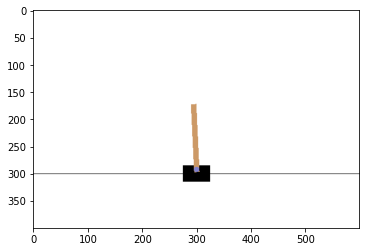

In [48]:
import matplotlib.pyplot as plt
plt.imshow(env.render(mode='rgb_array'));

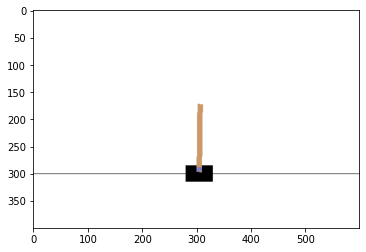

In [52]:
env.reset()
plt.imshow(env.render(mode='rgb_array'));

La diferencia es sutil, esto pues este ambiente tiene un desafío como diseño. Hay que mantener el péndulo vertical tanto como se pueda. Luego de eso el ambiente termina. <br>
Ambientes como éste se denominan episódicos. Y tienden a funcionar en series de episodios. Muchos juegos caen en esta categoría, juegos de atari como pacman, o incluso juegos analógicos como el ajedrés también son episódicos.<br>
Los episodios de este ambiente terminan si:


*   El ángulo del péndulo es mayor a $\pm 12°$
*   La posición del carro es mayor a $\pm 2.4$
*   El largo del episodio es mayor a 500



Cada ambiente puede enviar una secuencia de acciones aleatorias si se le desea.

In [77]:
[env.action_space.sample() for _ in range(10)]

[array([1.7111827], dtype=float32),
 array([0.00261788], dtype=float32),
 array([1.1922445], dtype=float32),
 array([0.33288404], dtype=float32),
 array([-0.6930931], dtype=float32),
 array([-0.9534121], dtype=float32),
 array([-1.3631978], dtype=float32),
 array([-1.9583023], dtype=float32),
 array([-1.806887], dtype=float32),
 array([1.0154958], dtype=float32)]

Calculemos cuantas acciones de "ir a la izquierda" puede tomar en promedio el sistema antes de que termine el episodio.

In [78]:
def actions_till_done(env, action):
    env.reset()
    done = False
    count = 0
    while done == False:
        _, _, done, _, = env.step(action)
        count += 1
    return count
  
# Get an estimate for how many 0 actions you can take on average before the 
# pole falls over
np.mean([actions_till_done(env, 0) for _ in range(100)])

IndexError: ignored

De la misma manera se puede definir un criterio que calcule la cantidad de recompensas que se pueden obtener por episodio en promedio.

In [57]:
def average_episodic_return(env, agent, episodes=10, max_steps_per_episode=500):
    episode_rewards = []
    for episode in range(episodes):
        total_rewards = 0
        obs = env.reset()
        for t in range(max_steps_per_episode):
            out = agent(obs) # we don't care about the probabilities here
            assert ("Action" in out), "The key 'Action' was missing from the agents output."
            obs, rew, done, _ = env.step(out["Action"])
            total_rewards += rew
            # check if we are done, if so, exit loop
            if done:
                break
                
        episode_rewards.append(total_rewards)
        
    return {
        "AverageEpisodicReturn": np.mean(episode_rewards), 
        "StandardDeviation":np.sqrt(np.var(episode_rewards))
    }

In [58]:
def agent_left(observation):
    return {"Action":0}

In [59]:
average_episodic_return(env, agent_left)

{'AverageEpisodicReturn': 9.2, 'StandardDeviation': 0.7483314773547883}

De la misma forma que pudimos mostrar una imagen de un estado del agente se puede presentar al agente en una secuencia animada.

In [74]:
from collections import deque
import matplotlib.animation
import matplotlib.pyplot as plt
%matplotlib inline

def animate_agent(env, agent, max_steps = 400):
    obs = env.reset()
    frames = deque()
    frames.append(env.render(mode='rgb_array'))
    for _ in range(max_steps):
        out = agent(obs)
        assert ("Action" in out), "The key 'Action' was missing from the agents output."
        action = out["Action"]
        obs, _ , done, _ = env.step(action)
        frames.append(env.render(mode='rgb_array'))
        if done:
            break
            
    return animate_frames(frames)

def animate_frames(frames):
    new_height = 2.2
    original_height = frames[0].shape[0]
    original_width = frames[0].shape[1]
    new_width = (new_height / original_height) * original_width
    fig = plt.figure(figsize=(new_width, new_height), dpi = 120)
    
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    patch = ax.imshow(frames[0], aspect='auto', animated=True, interpolation='bilinear')
    animate = lambda i: patch.set_data(frames[i])
    
    ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(frames), interval = 50)
    
    plt.close()
    return HTML(ani.to_jshtml())

¿Cómo se ve el agente cuando se le da la orden de ir siempre a la izquierda?

In [75]:
def agent_left(observation):
    return {"Action":0}
  
animate_agent(env, agent_left, max_steps = 400)

IndexError: ignored

¿Y si se envía una orden aleatoria para que se mueva a izquierda o derecha?

In [71]:
def agent_random(observation):
    return {"Action":np.random.choice([0, 1])}

In [72]:
average_episodic_return(env, agent_random)

IndexError: ignored

In [69]:
animate_agent(env, agent_random)

IndexError: ignored

Podemos definir una función que discretice el valor del estado en caso de que necesitasemos un valor en este dominio.

In [70]:
def state_for(observation):
    ranges = [np.arange(-1, 1.25, 0.25), np.arange(-0.3, 0.375, 0.075)[:9], np.arange(-1, 1.25, 0.25)]
    state = np.zeros((3,)) #Ignorando el primer sensor
    for i, (obs, limits) in enumerate(zip(observation[1:], ranges)):
        if obs < limits[0]:
            state[i] = 0
            continue
        for j in range(1, len(limits) - 1):
            if limits[j] <= obs <= limits[j+1]:
                state[i] = j
                break
        if obs > limits[len(limits) - 1]:  
            state[i] = len(limits)

    currstate = 0

    for i in range(3): 
        currstate += state[i] * (10 ** i)

    return int(currstate)


Este es un ejemplo del carro cuando ha sido entrenado correctamente un agente utilizando q learning.

In [65]:
animate_agent(env, agent)

NameError: ignored

In [76]:
average_episodic_return(env, agent)

NameError: ignored

#Pregunta 5

In [64]:
env = gym.make('Pendulum-v0')

#Pregunta 6

#Pregunta 7 (BONO)